# **Imports**

In [1]:
# import the dependencies
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os                
import cv2                                                                                             
import gc
from google.colab import drive
gc.enable()
 
print(tf.__version__)

2.3.0


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


**Download Data**

In [ ]:
# # you do not need to run this cell if you have an access to google drive.
# # download the dataset.
# !wget http://www.mediafire.com/file/83akhrn9n7ynj0f/orl_dataset.zip
# # unzip the dataset to google drive.
# !unzip orl_dataset.zip -d /content/drive/My\ Drive/College/Data_Mining_Assignments/Face_Recognition/data

# **2. Generate the Data Matrix and the Label vector**

In [5]:
filname = '../content/drive/My Drive/College/Data_Mining_Assignments/Face_Recognition/data/' #Arsany
# filname = '../content/drive/My Drive/Data_Mining_Assignments/Face_Recognition/data/' #Yomna

In [6]:
def list_files(dir):                                                                                                  
    r = []                                                                                                            
    subdirs = [x[0] for x in os.walk(dir)]                                                                            
    for subdir in subdirs:                                                                                            
        files = os.walk(subdir).__next__()[2]                                                                             
        if (len(files) > 0):                                                                                          
            for file in files:                                                                                        
                r.append(np.reshape(np.resize(cv2.imread(os.path.join(subdir, file)),(92,112)),(10304)))                                                                         
    return r
  


In [7]:
#data matrix
x = list_files(filname)
X_array = np.asarray(x)
print(X_array.shape)

(400, 10304)


# **3. Split the Dataset into Training and Test sets**

In [9]:
# split the data
train_set = []
test_set = []
train_label = []
test_label = []
train7_set = []
test3_set = []
train7_label = []
test3_label = []
for i in range(400):
  if i % 2 == 0:
    test_set.append(X_array[i])
    test_label.append(np.floor(i/10) + 1.)
  else:
    train_set.append(X_array[i])
    train_label.append(np.floor(i/10) + 1.)
  # another split ratio of data
  if i % 10 in range(0,3):
    test3_set.append(X_array[i])
    test3_label.append(np.floor(i/10) + 1.)
  else:
    train7_set.append(X_array[i])
    train7_label.append(np.floor(i/10) + 1.)

train_set_array = np.asarray(train_set)
test_set_array = np.asarray(test_set)
train_label_array = np.asarray(train_label)
test_label_array = np.asarray(test_label)

print("\nTrain set\n",train_set_array)
print("\nTrain set shape\n",train_set_array.shape)
print("\nTest set\n",test_set_array)
print("\nTest set shape\n",test_set_array.shape)

print("\n train label\n",train_label_array)
print("\n train label\n",train_label_array.shape)
print("\n test label\n",test_label_array)
print("\n test label\n",test_label_array.shape)


train7_set_array = np.asarray(train7_set)
test3_set_array = np.asarray(test3_set)
train7_label_array = np.asarray(train7_label)
test3_label_array = np.asarray(test3_label)

print("\nTrain7 set\n",train7_set_array)
print("\nTrain7 set shape\n",train7_set_array.shape)
print("\nTest3 set\n",test3_set_array)
print("\nTest3 set shape\n",test3_set_array.shape)

print("\n train7 label\n",train7_label_array)
print("\n train7 label\n",train7_label_array.shape)
print("\n test3 label\n",test3_label_array)
print("\n test3 label\n",test3_label_array.shape)


Train set
 [[ 69  69  69 ... 141 150 150]
 [ 46  46  46 ...  60  52  52]
 [ 41  41  41 ... 101  95  95]
 ...
 [ 45  45  45 ... 192 187 187]
 [ 47  47  47 ... 176 145 145]
 [116 116 116 ... 177 176 176]]

Train set shape
 (200, 10304)

Test set
 [[ 72  72  72 ... 110 114 114]
 [ 63  63  63 ... 175 173 173]
 [ 61  61  61 ... 144 145 145]
 ...
 [ 55  55  55 ...  79  77  77]
 [121 121 121 ... 144 134 134]
 [121 121 121 ... 186 186 186]]

Test set shape
 (200, 10304)

 train label
 [ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 20. 20. 20. 20. 20. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 2

In [ ]:
# # split the label vector
# train_y = []
# test_y = []
# for i in range(40):
#   if i % 2 == 0:
#     test_y.append(y[i])
#   else:
#     train_y.append(y[i])

# train_y_vector= np.asarray(train_y)
# test_y_vector = np.asarray(test_y)

# print("\nTrain y vector\n",train_y_vector)
# print("\nTrain y vector shape\n",train_y_vector.shape)
# print("\nTest y vector\n",test_y_vector)
# print("\nTest y vector shape\n",test_y_vector.shape)

# **4. Classification using PCA.**

In [10]:
# PCA algorithm
def PCA(D, alpha):
  # Compute the mean vector (10304x1)
  mu = np.mean(D, axis = 0).reshape(10304,1)
  print("\n the mean is:\n", mu)

  # center the data
  z = D - mu.T
  print("\n the centered data is:\n",z)

  # compute COV matrix
  COV = np.dot(z.T, z) / D.shape[0]
  print("\n the covariance matrix is:\n",COV)

  # find eigenvalues and eigenvectors
  values, vectors = np.linalg.eigh(COV)
  sorted_eig  = np.argsort(-values)
  values = values[sorted_eig]
  # values = np.diag(values)
  vectors = vectors[:, sorted_eig]
  print("\n the eigenvalues are:\n", values)
  print("\n the eigenvectors are:\n", vectors)

  # fraction of total variance
  tot = np.sum(values)
  var_exp = [(i / tot) for i in (values)]
  # var_exp = np.diag(var_exp)
  print("\n the fraction of total variances:\n", var_exp)

  # calculate the cumulative sum
  fr = np.cumsum(var_exp)
  print("\n the cumulative sum:\n",fr)

  # choose dimentionality
  index = 0
  for i in range(len(fr)):
    if fr[i] >= alpha:
      # smallest r so that f(r) >= alpha
      item_value = fr[i]
      index = i
      break
  print("\n item is:\n",item_value)
  print("\n we take till index: \n", index)

  # Compute projection matrix U
  U = vectors[:, :index]
  print("\n the projection matrix is:\n",U)

  return U

In [11]:
U1 = PCA(train_set_array, 0.8)


 the mean is:
 [[ 85.585]
 [ 85.585]
 [ 85.585]
 ...
 [159.6  ]
 [159.695]
 [159.695]]

 the centered data is:
 [[ -16.585  -16.585  -16.585 ...  -18.6     -9.695   -9.695]
 [ -39.585  -39.585  -39.585 ...  -99.6   -107.695 -107.695]
 [ -44.585  -44.585  -44.585 ...  -58.6    -64.695  -64.695]
 ...
 [ -40.585  -40.585  -40.585 ...   32.4     27.305   27.305]
 [ -38.585  -38.585  -38.585 ...   16.4    -14.695  -14.695]
 [  30.415   30.415   30.415 ...   17.4     16.305   16.305]]

 the covariance matrix is:
 [[1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 ...
 [ 600.714     600.714     600.714    ... 1743.07     1733.648
  1733.648   ]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975

In [12]:
U1.shape

(10304, 7)

In [13]:
U2 = PCA(train_set_array, 0.85)


 the mean is:
 [[ 85.585]
 [ 85.585]
 [ 85.585]
 ...
 [159.6  ]
 [159.695]
 [159.695]]

 the centered data is:
 [[ -16.585  -16.585  -16.585 ...  -18.6     -9.695   -9.695]
 [ -39.585  -39.585  -39.585 ...  -99.6   -107.695 -107.695]
 [ -44.585  -44.585  -44.585 ...  -58.6    -64.695  -64.695]
 ...
 [ -40.585  -40.585  -40.585 ...   32.4     27.305   27.305]
 [ -38.585  -38.585  -38.585 ...   16.4    -14.695  -14.695]
 [  30.415   30.415   30.415 ...   17.4     16.305   16.305]]

 the covariance matrix is:
 [[1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 ...
 [ 600.714     600.714     600.714    ... 1743.07     1733.648
  1733.648   ]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975

In [14]:
U2.shape

(10304, 11)

In [15]:
U3 = PCA(train_set_array, 0.9)


 the mean is:
 [[ 85.585]
 [ 85.585]
 [ 85.585]
 ...
 [159.6  ]
 [159.695]
 [159.695]]

 the centered data is:
 [[ -16.585  -16.585  -16.585 ...  -18.6     -9.695   -9.695]
 [ -39.585  -39.585  -39.585 ...  -99.6   -107.695 -107.695]
 [ -44.585  -44.585  -44.585 ...  -58.6    -64.695  -64.695]
 ...
 [ -40.585  -40.585  -40.585 ...   32.4     27.305   27.305]
 [ -38.585  -38.585  -38.585 ...   16.4    -14.695  -14.695]
 [  30.415   30.415   30.415 ...   17.4     16.305   16.305]]

 the covariance matrix is:
 [[1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 ...
 [ 600.714     600.714     600.714    ... 1743.07     1733.648
  1733.648   ]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975

In [16]:
U3.shape

(10304, 19)

In [17]:
U4 = PCA(train_set_array, 0.95)


 the mean is:
 [[ 85.585]
 [ 85.585]
 [ 85.585]
 ...
 [159.6  ]
 [159.695]
 [159.695]]

 the centered data is:
 [[ -16.585  -16.585  -16.585 ...  -18.6     -9.695   -9.695]
 [ -39.585  -39.585  -39.585 ...  -99.6   -107.695 -107.695]
 [ -44.585  -44.585  -44.585 ...  -58.6    -64.695  -64.695]
 ...
 [ -40.585  -40.585  -40.585 ...   32.4     27.305   27.305]
 [ -38.585  -38.585  -38.585 ...   16.4    -14.695  -14.695]
 [  30.415   30.415   30.415 ...   17.4     16.305   16.305]]

 the covariance matrix is:
 [[1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 [1266.002775 1266.002775 1266.002775 ...  600.714     618.133425
   618.133425]
 ...
 [ 600.714     600.714     600.714    ... 1743.07     1733.648
  1733.648   ]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975]
 [ 618.133425  618.133425  618.133425 ... 1733.648    1780.831975
  1780.831975

In [18]:
U4.shape

(10304, 45)

In [19]:
# Project the training set and test sets
P1_test = np.dot(test_set_array, U1)
print("\n the projection of test is:\n", P1_test)
print(P1_test.shape)

P1_train = np.dot(train_set_array, U1)
print("\n the projection of train is:\n", P1_train)
print(P1_train.shape)


 the projection of test is:
 [[-15457.82911973  -3573.12209449   3165.85767848 ...    -80.14520917
   -1352.52070152  -2239.86551648]
 [-11380.63247846  -1840.81221068   3809.75788253 ...    430.69878526
    -788.81520546  -1522.17417942]
 [-10948.37848402  -1930.84916211   4099.12615232 ...    660.68965961
    -498.53330018  -2092.44956898]
 ...
 [-11814.66469393  -2287.2211191    2728.80494081 ...    946.51985294
   -1085.46095316  -1837.22087323]
 [-13028.1756785   -5371.00338381   4242.11509534 ...   -834.30252595
    -122.95287046  -1387.56004124]
 [-13110.62550255  -5515.25286423   4058.50975778 ...   -875.91867081
   -1001.89272605  -1148.37290804]]
(200, 7)

 the projection of train is:
 [[-1.50501670e+04 -3.23903839e+03  3.22945446e+03 ... -3.66583341e+02
  -9.69825504e+02 -2.53899569e+03]
 [-1.06119651e+04 -1.76419430e+03  2.85718297e+03 ...  1.07374792e+03
  -7.48682549e+00 -2.32230144e+03]
 [-1.03694534e+04 -1.13026501e+03  3.11393742e+03 ...  3.38175537e+02
   5.39729885e

In [20]:
P2_test = np.dot(test_set_array, U2)
print("\n the projection of test is:\n", P2_test)
print(P2_test.shape)

P2_train = np.dot(train_set_array, U2)
print("\n the projection of train is:\n", P2_train)
print(P2_train.shape)


 the projection of test is:
 [[-15457.82911973  -3573.12209449   3165.85767848 ...    214.79270661
    -636.09404339  -1148.94164744]
 [-11380.63247846  -1840.81221068   3809.75788253 ...    654.44471283
    -158.76845231    -87.78199414]
 [-10948.37848402  -1930.84916211   4099.12615232 ...   1287.13325114
     109.62808008   -420.0983415 ]
 ...
 [-11814.66469393  -2287.2211191    2728.80494081 ...   -562.16384876
     -73.89378953   -408.88579531]
 [-13028.1756785   -5371.00338381   4242.11509534 ...   1039.29217464
      46.8896529    -406.65776267]
 [-13110.62550255  -5515.25286423   4058.50975778 ...   1364.24198419
      95.64025018   -406.68873918]]
(200, 11)

 the projection of train is:
 [[-1.50501670e+04 -3.23903839e+03  3.22945446e+03 ...  3.52035501e+02
  -6.10669434e+02 -1.14877267e+03]
 [-1.06119651e+04 -1.76419430e+03  2.85718297e+03 ... -1.24945785e+01
  -1.70073424e+02 -9.50272637e+02]
 [-1.03694534e+04 -1.13026501e+03  3.11393742e+03 ... -3.44089146e+01
  -4.46112871

In [21]:
P3_test = np.dot(test_set_array, U3)
print("\n the projection of test is:\n", P3_test)
print(P3_test.shape)

P3_train = np.dot(train_set_array, U3)
print("\n the projection of train is:\n", P3_train)
print(P3_train.shape)


 the projection of test is:
 [[-15457.82911973  -3573.12209449   3165.85767848 ...    128.00812204
     217.82890365   -666.50732213]
 [-11380.63247846  -1840.81221068   3809.75788253 ...     51.71826441
    -346.04823007     68.63550707]
 [-10948.37848402  -1930.84916211   4099.12615232 ...    141.04532472
    -293.29209036    -97.81048353]
 ...
 [-11814.66469393  -2287.2211191    2728.80494081 ...     66.23815266
    -502.75098318   -542.10212451]
 [-13028.1756785   -5371.00338381   4242.11509534 ...    634.67953531
    -266.27349321    196.00149167]
 [-13110.62550255  -5515.25286423   4058.50975778 ...    -77.13245712
     273.75961989   -295.90602909]]
(200, 19)

 the projection of train is:
 [[-1.50501670e+04 -3.23903839e+03  3.22945446e+03 ...  6.42037549e+02
   4.20860386e+02 -8.89063553e+02]
 [-1.06119651e+04 -1.76419430e+03  2.85718297e+03 ...  1.66232843e+02
  -2.07906739e+02 -3.23678234e+02]
 [-1.03694534e+04 -1.13026501e+03  3.11393742e+03 ...  4.56796491e+02
  -2.55848664

In [22]:
P4_test = np.dot(test_set_array, U4)
print("\n the projection of test is:\n", P4_test)
print(P4_test.shape)

P4_train = np.dot(train_set_array, U4)
print("\n the projection of train is:\n", P4_train)
print(P4_train.shape)


 the projection of test is:
 [[-1.54578291e+04 -3.57312209e+03  3.16585768e+03 ... -2.36346863e+01
  -1.69488096e+02 -1.17595630e+02]
 [-1.13806325e+04 -1.84081221e+03  3.80975788e+03 ...  4.13898236e+01
   1.34416435e+02 -1.93503149e+02]
 [-1.09483785e+04 -1.93084916e+03  4.09912615e+03 ...  1.17627762e+02
   1.01878983e+02 -6.97373953e+01]
 ...
 [-1.18146647e+04 -2.28722112e+03  2.72880494e+03 ...  4.46068418e+01
   1.25361412e+02  2.35536272e+02]
 [-1.30281757e+04 -5.37100338e+03  4.24211510e+03 ...  5.11712633e+00
   8.78649401e+01 -1.22941845e+02]
 [-1.31106255e+04 -5.51525286e+03  4.05850976e+03 ...  9.93873424e+01
   3.21813970e+02 -4.23222502e+01]]
(200, 45)

 the projection of train is:
 [[-15050.16704071  -3239.03839302   3229.45446118 ...    105.92443391
    -365.69261602     23.44527358]
 [-10611.96508536  -1764.19430465   2857.18297256 ...    183.75986249
      67.4411235     -77.18771855]
 [-10369.45337065  -1130.2650097    3113.93742357 ...    197.22475876
     -25.7272

In [23]:
# Use a simple classifier (first Nearest Neighbor to determine the class labels).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 1. 29.  1.  1.  1. 21. 39.  2. 21.  2.  3.  3. 23.  3.  3.  4.  4.  4.
 23.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  3.
  8.  8.  8.  8. 30.  9.  9.  1. 30. 10. 10. 10. 10. 10. 11. 11. 11. 19.
 11. 12. 12. 12. 14. 14. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19.  4. 20. 20. 20. 20.  7. 21. 21.  6. 21. 13. 22. 22.
  4. 22. 23. 23. 23. 23. 31. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26.  6. 27.  6.  6. 27. 28. 28. 28. 28. 28. 29. 40. 40. 40.
 40.  9.  9. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 31. 32. 32. 33. 33.
 33. 33. 33. 39. 34. 34. 34. 34. 35. 15. 39. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 

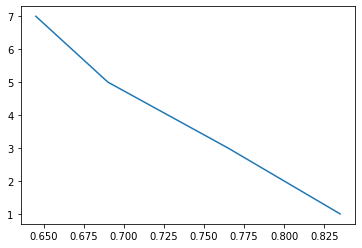

In [28]:
# @ alpha = 0.8
accuracy_alpha1 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P1_train, train_label_array)
  y_pred = classifier.predict(P1_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha1.append(accuracy_score(test_label_array, y_pred))

print("\n accuracy for alpha = 0.8 is:\n",accuracy_alpha1)
  # accuracy_score(y_pred, test_label, normalize=False)

print("\n accuracy for PCA when 50/50 split graph is:\n")
plt.plot(accuracy_alpha1,[1,3,5,7])
plt.show()


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 1.  3.  1.  1.  1. 21. 39.  2.  2.  2.  3.  3.  1.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8. 30.  9.  9.  1.  1. 10. 10. 10. 10. 10. 11. 11. 11. 19.
 11. 12. 12. 12. 14.  2. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19.  8.  4. 20. 20. 20. 20. 21. 21. 21.  6. 21. 13. 22. 22.
  4. 22. 23. 23. 23. 23. 32. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27.  6.  6. 27. 28. 28. 28. 28. 28. 29. 40. 40. 40.
  5.  9.  9. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 31. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 15. 35. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 16. 38. 38. 38. 38. 38. 39. 39. 39. 

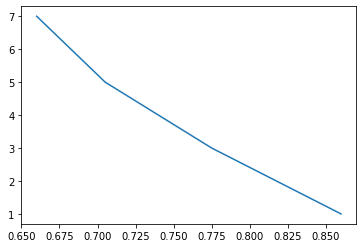

In [29]:
# @  alpha = 0.85
accuracy_alpha2 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P2_train, train_label_array)
  y_pred = classifier.predict(P2_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha2.append(accuracy_score(test_label_array, y_pred))

print("\n accuracy for alpha = 0.85 is:\n",accuracy_alpha2)

print("\n accuracy for PCA when 50/50 split graph is:\n")
plt.plot(accuracy_alpha2,[1,3,5,7])
plt.show()


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 1.  3.  1.  1.  1.  2. 39.  2.  2.  2.  3.  3.  1.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  1.  9.  9.  1.  1. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 21.  2. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19.  8. 40. 20. 20. 20. 20. 21. 21. 21.  6. 21. 13. 22. 22.
 22. 22. 23. 23. 23. 23. 31. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27.  6.  6. 27. 28. 28. 28. 28. 28. 29. 40. 40. 40.
  5.  9.  9. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 31. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 

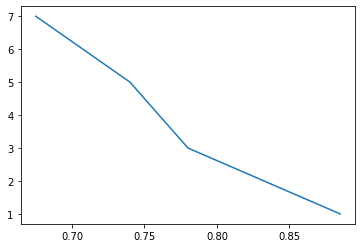

In [30]:
# @  alpha = 0.9
accuracy_alpha3 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P3_train, train_label_array)
  y_pred = classifier.predict(P3_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha3.append(accuracy_score(test_label_array, y_pred))

print("\n accuracy for alpha = 0.9 is:\n",accuracy_alpha3)

print("\n accuracy for PCA when 50/50 split graph is:\n")
plt.plot(accuracy_alpha3,[1,3,5,7])
plt.show()


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 1.  3.  1.  1.  1. 12. 39.  2.  2.  2.  3.  3.  1.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  1.  9.  9.  1.  1. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 14.  2. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 40. 20. 20. 20. 20. 21. 21. 21.  6. 21. 13. 22. 22.
 22. 22. 23. 23. 23. 23. 31. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27.  6. 30. 27. 28. 28. 28. 28. 28. 29. 40. 40. 40.
  5.  9.  9. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 31. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 16. 38. 38. 38. 38. 38. 39. 39. 39. 

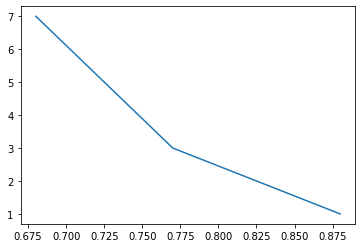

In [31]:
# @  alpha = 0.95
accuracy_alpha4 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(P4_train, train_label_array)
  y_pred = classifier.predict(P4_test)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_alpha4.append(accuracy_score(test_label_array, y_pred))

print("\n accuracy for alpha = 0.95 is:\n",accuracy_alpha4)

print("\n accuracy for PCA when 50/50 split graph is:\n")
plt.plot(accuracy_alpha4,[1,3,5,7])
plt.show()

# **5. Classification using LDA.**

In [ ]:
def LDA(D,Dtest):
  X = []
  M = []
  for i in range(40):
      subarray = []
      for j in range(5):
          subarray.append(D[i*5+j])
      M.append(np.mean(subarray,axis = 0))
      X.append(subarray)
  X = np.asarray(X)  # (40, 5, 10304)
  M = np.mean(X,axis = 1)  # (40, 10304)
  overall_M = np.mean(M,axis = 0)  # 10304
  S = np.zeros([10304,10304])
  S_b = np.zeros([10304,10304])
  for i in range (40):
    Zi = X[i]-M[i]
    S_b += 5*np.dot((M-overall_M).T,(M-overall_M))
    S += np.dot(Zi.T,Zi)
  # print(S_b.shape)
  product = np.matmul(np.linalg.pinv(S),S_b) # S inv
  vals,vecs = np.linalg.eigh(product)
  idx = vals.argsort()[::-1]
  vals = vals[idx]
  vecs = vecs[:,idx]
  Train_LDA = np.dot(D , vecs)
  Test_LDA = np.dot(Dtest , vecs)
  return Train_LDA,Test_LDA

In [ ]:
Train_LDA,Test_LDA = LDA(train_set_array,test_set_array)


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 1.  3.  1.  1.  1. 12. 39.  2.  2.  2.  3.  3.  1.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  1.  9.  9.  1.  1. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 14.  2. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 40. 20. 20. 20. 20. 21. 21. 21.  6. 21. 13. 22. 22.
 22. 22. 23. 23. 23. 23. 31. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27. 17. 30. 27. 28. 28. 28. 28. 28. 29. 40. 40. 40.
  5.  9.  9. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 31. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 16. 38. 38. 38. 38. 38. 39. 39. 39. 

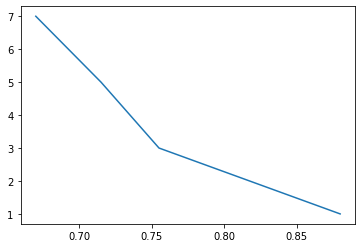

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
accuracy_LDA = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(Train_LDA, train_label_array)
  y_pred = classifier.predict(Test_LDA)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_LDA.append(accuracy_score(test_label_array, y_pred))

print("\n accuracy for LDA when 50/50 split is:\n",accuracy_LDA)
plt.plot(accuracy_LDA,[1,3,5,7])
plt.show()

In [ ]:
Train7_LDA,Test3_LDA = LDA(train7_set_array,test3_set_array)


 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3. 11. 12.  2. 39.  3.  8.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.
  8.  8.  7.  8. 19.  8.  9.  9.  9. 10. 10. 10. 11.  7. 11. 12. 12. 12.
 13. 13. 13. 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18.
 19. 19. 19.  4. 20. 20. 21.  7. 21. 13. 22. 22. 23. 32. 23. 24. 24. 24.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29.  9. 30.  9.
 31. 31. 31. 32. 32. 32. 33. 33. 33. 39. 34. 34. 35. 35. 35. 36. 36. 36.
 16. 16. 37. 38. 38. 38. 39. 39. 39. 40. 40. 40.]

 prediction shape:
 (120,)

 classifier:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

 prediction:
 [ 3.  3.  1.  2.  2. 35.  3.  8.  3.  4.  4.  4.  

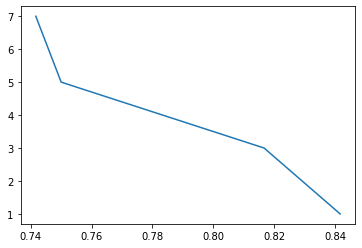

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
accuracy_LDA2 = []
for i in [1,3,5,7]:
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(Train7_LDA, train7_label_array)
  y_pred = classifier.predict(Test3_LDA)

  print("\n classifier:\n", classifier)
  print("\n prediction:\n", y_pred)
  print("\n prediction shape:\n", y_pred.shape)

  # Report Accuracy for every value of alpha separately
  accuracy_LDA2.append(accuracy_score(test3_label_array, y_pred))

print("\n accuracy for LDA when 70/30 split is:\n",accuracy_LDA2)
plt.plot(accuracy_LDA2,[1,3,5,7])
plt.show()